In [1]:
import torch
from models.KronLeNet import KronLeNet
model = KronLeNet()
# kronlenet.pth save the state_dict of the model
model.load_state_dict(torch.load('kronlenet.pth'))

<All keys matched successfully>

In [2]:
model.kronfc1.a
# find the zeros in kronfc1.a, we consider < 1e-5 as zero
torch.abs(model.kronfc3.a) < 1e-5
# find the position of the zeros
torch.nonzero(torch.abs(model.kronfc3.a) < 1e-5)

tensor([[1, 4, 1],
        [1, 8, 1],
        [3, 4, 0]])

In [3]:
# print(model.kronfc3.a)
N = model.kronfc3.a.shape[0]
for i in range(N):
    print(model.kronfc3.a[i][4][1])
for i in range(N):
    print(model.kronfc3.a[i][8][1])
for i in range(N):
    print(model.kronfc3.a[i][4][0])

tensor(0.0095, grad_fn=<SelectBackward0>)
tensor(-1.3385e-06, grad_fn=<SelectBackward0>)
tensor(0.0017, grad_fn=<SelectBackward0>)
tensor(1.1705e-05, grad_fn=<SelectBackward0>)
tensor(0.1978, grad_fn=<SelectBackward0>)
tensor(3.3394e-07, grad_fn=<SelectBackward0>)
tensor(0.0528, grad_fn=<SelectBackward0>)
tensor(0.0001, grad_fn=<SelectBackward0>)
tensor(-0.0058, grad_fn=<SelectBackward0>)
tensor(2.4071e-05, grad_fn=<SelectBackward0>)
tensor(-0.0004, grad_fn=<SelectBackward0>)
tensor(1.0827e-06, grad_fn=<SelectBackward0>)


In [4]:
# draw a matrix, using the values of kronfc3.a
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
plt.figure(figsize=(5, 5))
a = model.kronfc3.a.detach().numpy()
N = a.shape[0]
from einops import rearrange
a = rearrange(a, 'n i j -> i j n')
# using norm 2 to squeeze the last dimension
a = np.linalg.norm(a, axis=2)
# show the number of a and add red border in (4,0) (4,1) (8,1) squares
 


<Figure size 1500x1500 with 0 Axes>

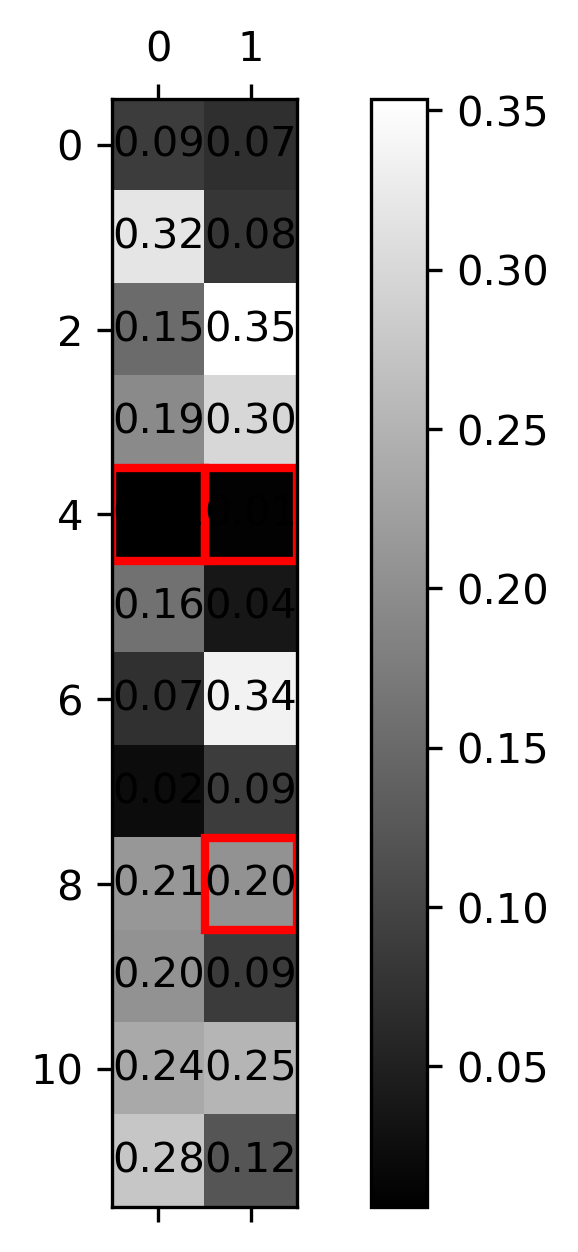

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches



# 创建灰度图
fig, ax = plt.subplots()

# 设置灰度
cax = ax.matshow(a, cmap='gray')

# 在4,0和4,1以及8,1位置画红色边框
rectangles = [
    patches.Rectangle((-0.5, 3.5), 1, 1, linewidth=2, edgecolor='red', facecolor='none'),
    patches.Rectangle((0.5, 3.5), 1, 1, linewidth=2, edgecolor='red', facecolor='none'),
    patches.Rectangle((0.5, 7.5), 1, 1, linewidth=2, edgecolor='red', facecolor='none')
]

for rect in rectangles:
    ax.add_patch(rect)

# 在中间显示矩阵值
for i in range(a.shape[0]):
    for j in range(a.shape[1]):
        ax.text(j, i, f'{a[i, j]:.2f}', va='center', ha='center', color='black')

# 显示颜色条
cbar = fig.colorbar(cax)

plt.show()

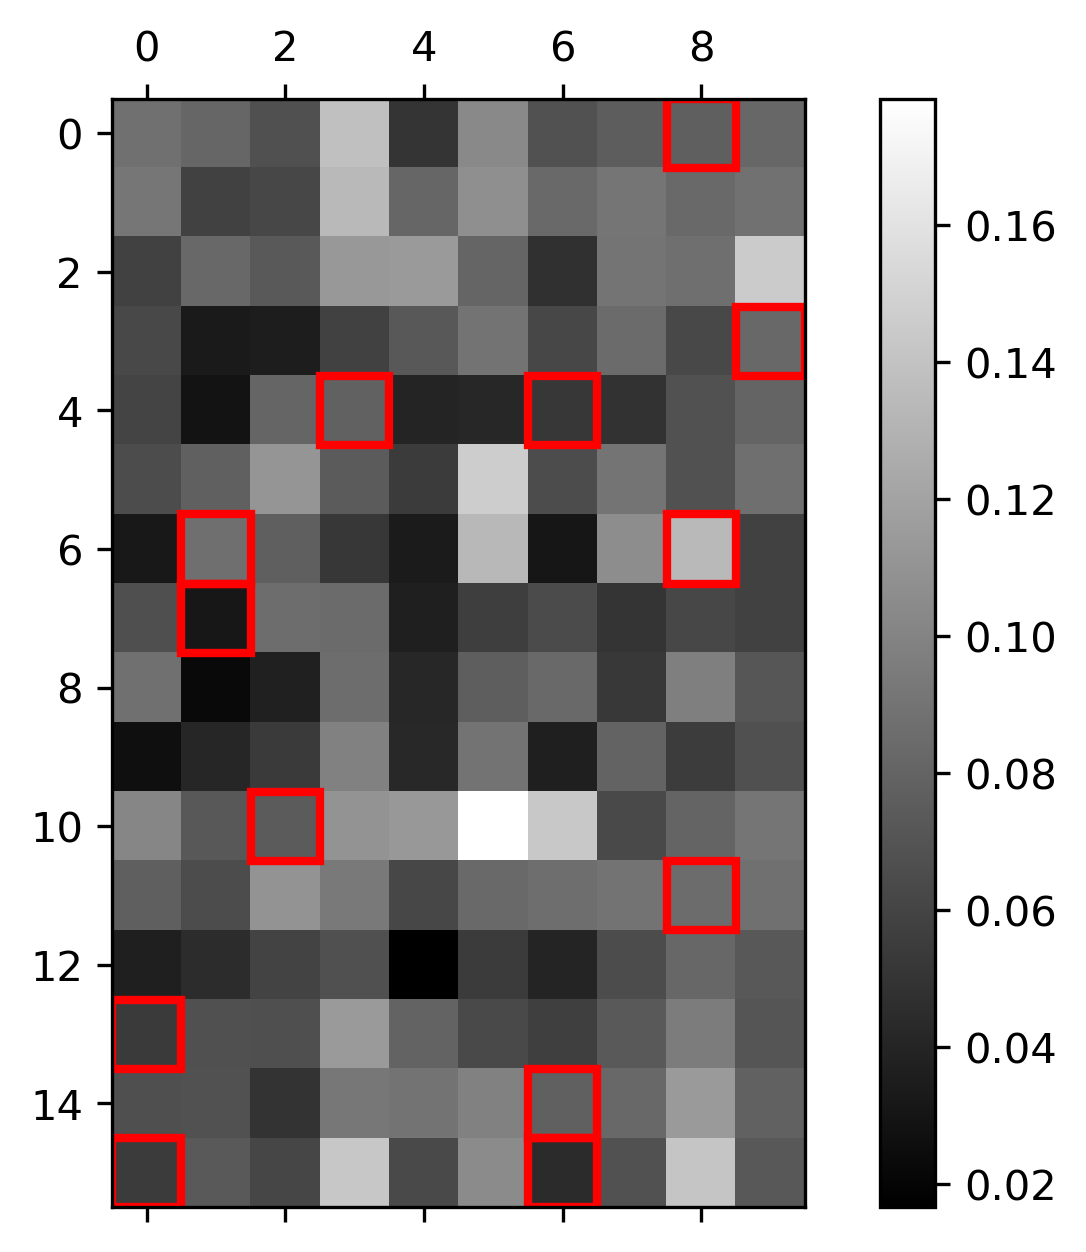

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
index = torch.nonzero(torch.abs(model.kronfc1.a) < 1e-5)
a = model.kronfc1.a.detach().numpy()

N = a.shape[0]
from einops import rearrange
a = rearrange(a, 'n i j -> i j n')
# using norm 2 to squeeze the last dimension
a = np.linalg.norm(a, axis=2)

# 创建灰度图
fig, ax = plt.subplots()

# 设置灰度
cax = ax.matshow(a, cmap='gray')

# 在4,0和4,1以及8,1位置画红色边框

rectangles = [
    # patches.Rectangle((-0.5, 3.5), 1, 1, linewidth=2, edgecolor='red', facecolor='none'),
    # patches.Rectangle((0.5, 3.5), 1, 1, linewidth=2, edgecolor='red', facecolor='none'),
    # patches.Rectangle((0.5, 7.5), 1, 1, linewidth=2, edgecolor='red', facecolor='none')
]
for i in index:
    rectangles.append(patches.Rectangle((i[2]-0.5, i[1]-0.5), 1, 1, linewidth=2, edgecolor='red', facecolor='none') )

for rect in rectangles:
    ax.add_patch(rect)

# 在中间显示矩阵值
# for i in range(a.shape[0]):
#     for j in range(a.shape[1]):
#         ax.text(j, i, f'{a[i, j]:.2f}', va='center', ha='center', color='black')

# 显示颜色条
cbar = fig.colorbar(cax)

plt.show()

In [9]:
a.max(),a.min()

(0.17847148, 0.016580207)